# House pricing prediction

This notebook holds my exercise on predicting house prices on the dataset from:

https://www.kaggle.com/lespin/house-prices-dataset

## Import and preview data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

## Import data

In [76]:
# View the head of the input file
#!head train.csv

In [4]:
# Count the lines in the input file
!wc -l train.csv

    1461 train.csv


In [5]:
# Read the input into a pandas dataframe
df = pd.read_csv('train.csv')
#df = pd.read_csv('train.csv', nrows=100000)

## Inspect data

### Basic diagnostics

#### General

In [6]:
# View the data
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
# Print basic column info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Print basic statistical description

df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# Generate a basic report

from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='input_profile.html')

### Custom diagnostics

#### Numerical variables

In [30]:
c_name = 'Column name'
c_type = 'Type'
n_counts = 'Counts'
n_missing = 'Missing'
n_unique = 'Cardinality'
n_negative = 'Negative'
skewness = 'Skewness'
max_dev = 'Max|Deviation|'

variables_num = list(df.select_dtypes(include=np.number).columns)

print('====================')
print('Numerical variables')
print(f"Total: {len(variables_num)}")
print('=============================================================================================================')
print(f"{c_name:<30}{c_type:<10}{n_counts:<10}{n_missing:<10}{n_unique:<15}{n_negative:<10}{skewness:<10}\
{max_dev:<15}")
print('=============================================================================================================')

for v in variables_num:
    print(f"{v:<30}{str(df[v].dtype):<10}{df[v].count():<10}{df[v].isna().sum():<10}{df[v].nunique():<15}\
    {df[df[v]<0][v].count():<10}{np.round(df[v].skew(),3):<10}{abs((df[v]-df[v].mean())/df[v].std()).max():<15.3}")

Numerical variables
Total: 38
Column name                   Type      Counts    Missing   Cardinality    Negative  Skewness  Max|Deviation| 
Id                            int64     1460      0         1460               0         0.0       1.73           
MSSubClass                    int64     1460      0         15                 0         1.408     3.15           
LotFrontage                   float64   1201      259       110                0         2.164     10.0           
LotArea                       int64     1460      0         1073               0         12.208    20.5           
OverallQual                   int64     1460      0         10                 0         0.217     3.69           
OverallCond                   int64     1460      0         9                  0         0.693     4.11           
YearBuilt                     int64     1460      0         112                0         -0.613    3.29           
YearRemodAdd                  int64     1460      0   

#### Numerical variables with outliers

Printing variables with absolute deviations larger than 4 sigma

In [31]:
for v in variables_num:
    if abs((df[v]-df[v].mean())/df[v].std()).max()>4:
        print(f"{v:<30}{abs((df[v]-df[v].mean())/df[v].std()).max():.3}")

LotFrontage                   10.0
LotArea                       20.5
OverallCond                   4.11
MasVnrArea                    8.26
BsmtFinSF1                    11.4
BsmtFinSF2                    8.85
BsmtUnfSF                     4.0
TotalBsmtSF                   11.5
1stFlrSF                      9.13
LowQualFinSF                  11.6
GrLivArea                     7.85
BsmtFullBath                  4.96
BsmtHalfBath                  8.14
BedroomAbvGr                  6.29
KitchenAbvGr                  8.87
TotRmsAbvGrd                  4.6
GarageArea                    4.42
WoodDeckSF                    6.09
OpenPorchSF                   7.55
EnclosedPorch                 8.67
3SsnPorch                     17.2
ScreenPorch                   8.34
PoolArea                      18.3
MiscVal                       31.2
SalePrice                     7.23


#### Categorical variables

In [32]:
# Print summary for non-numerical variables

variables_cat = list(df.select_dtypes(exclude=np.number).columns)

print('========================')
print('Non-numerical variables')
print(f"Total: {len(variables_cat)}")
print('========================================================================')
print(f"{c_name:<30}{c_type:<10}{n_counts:<10}{n_missing:<10}{n_unique:<15}")
print('========================================================================')

for v in variables_cat:
    print(f"{v:<30}{str(df[v].dtype):<10}{df[v].count():<10}{df[v].isna().sum():<10}{df[v].nunique():<15}")

Non-numerical variables
Total: 43
Column name                   Type      Counts    Missing   Cardinality    
MSZoning                      object    1460      0         5              
Street                        object    1460      0         2              
Alley                         object    91        1369      2              
LotShape                      object    1460      0         4              
LandContour                   object    1460      0         4              
Utilities                     object    1460      0         2              
LotConfig                     object    1460      0         5              
LandSlope                     object    1460      0         3              
Neighborhood                  object    1460      0         25             
Condition1                    object    1460      0         9              
Condition2                    object    1460      0         8              
BldgType                      object    1460      0   

## Plotting some variables

<AxesSubplot:>

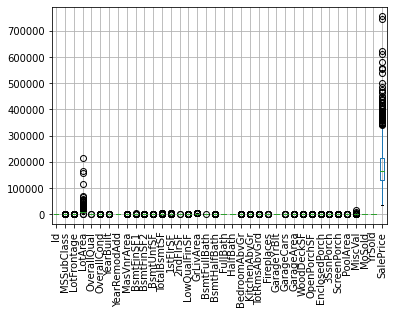

In [33]:
# Box plot of all numerical columns

variables=list(df.select_dtypes(include=np.number).columns)
#variables = []
df[variables].boxplot(column=variables, rot=90, fontsize=10)

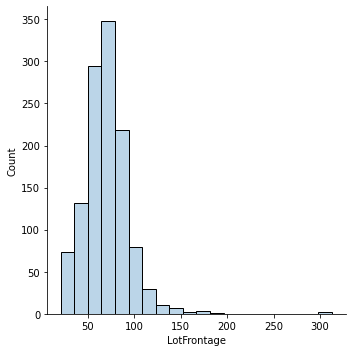

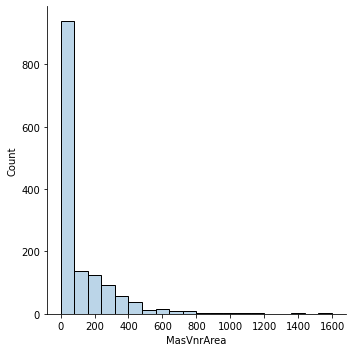

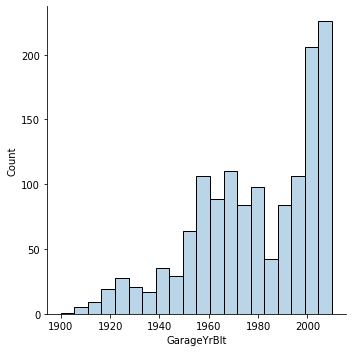

In [34]:
# List of numeric variables with missing values

variables_num_miss = [v for v in variables_num if sum(df[v].isna())>0]
#variables = []
for v in variables_num_miss:
    sb.displot(data=df, x=v, alpha=0.3, bins=20)

<AxesSubplot:>

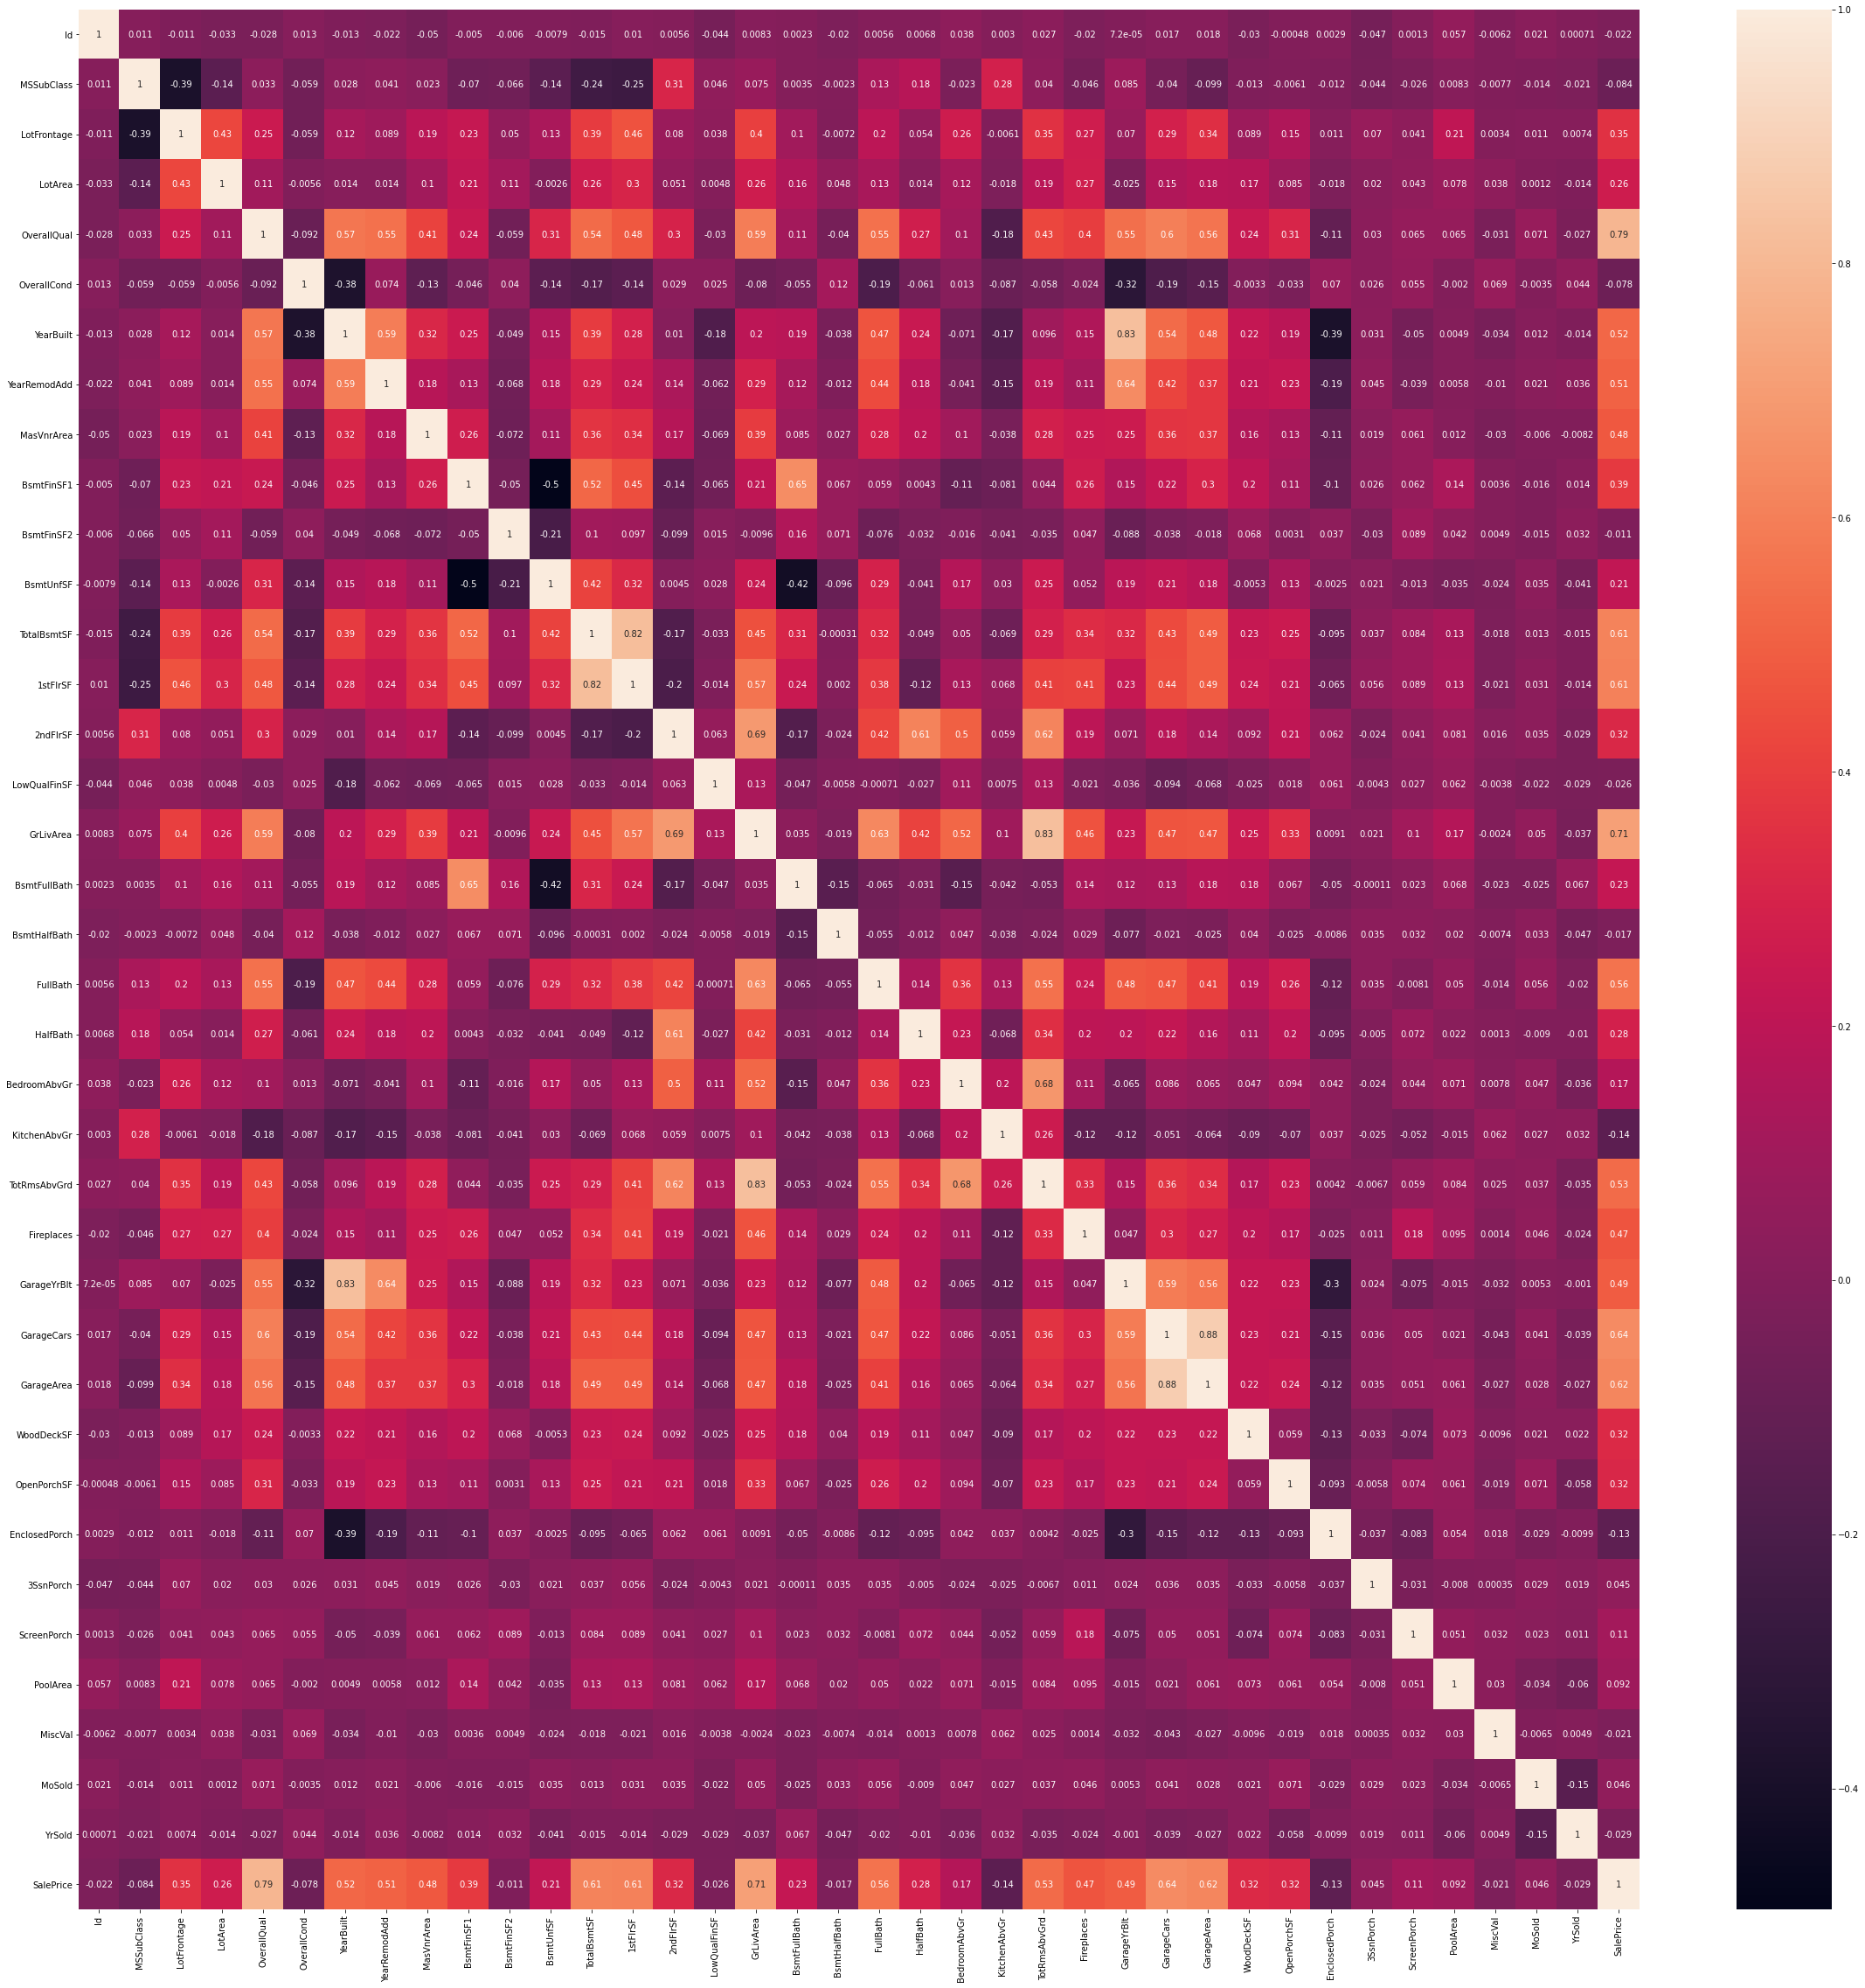

In [35]:
# Correlation matrix

corr = df.corr()
plt.figure(figsize = (40,40))
sb.heatmap(corr,annot=True)

## Data cleaning

### Check for duplicates

In [36]:
tmp = df.groupby(df.columns.tolist(),as_index=False).size()
print(f"Number of duplicate rows: {tmp[tmp['size']>1].shape[0]}")


Number of duplicate rows: 0


In [37]:
# Remove duplicate rows

#df.drop_duplicates(subset=['brand', 'style'], keep='last', inplace=False, ignore_index=False)

### Exclude useless variables

In [ ]:
#variables_to_exclude = []
#df.drop(variables_to_exclude, axis=1, inplace=True)

### Outliers

In [38]:
#Capping the outlier rows with Percentiles

for v in variables_num:
    upper_lim = df[v].quantile(.95)
    lower_lim = df[v].quantile(.05)
    df.loc[(df[v] > upper_lim),v] = upper_lim
    df.loc[(df[v] < lower_lim),v] = lower_lim

In [ ]:
#Dropping the outlier rows with a criterion on the number of standard deviations

#factor = 3 # threshold in standard deviations
#upper_lim = data['column'].mean () + data['column'].std () * factor
#lower_lim = data['column'].mean () - data['column'].std () * factor
#data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

In [ ]:
#Dropping the outlier rows with criteria on percentiles

#upper_lim = data['column'].quantile(.95)
#lower_lim = data['column'].quantile(.05)
#data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

## Feature engineering

### Date-time transformation

In [40]:
#import datetime

#def convert_time_vars(df):
#    df['srch_ci'] = pd.to_datetime(df['srch_ci'])
#    df['srch_co'] = pd.to_datetime(df['srch_co'])
#    df['date_time'] = pd.to_datetime(df['date_time'])

#    df['stay_duration'] = (df['srch_co'] - df['srch_ci']).astype('timedelta64[D]')
#    df['booking_in_advance'] = (df['srch_ci'] - df['date_time']).astype('timedelta64[D]')
    
    # For hotel check-in
    # Month, Year, Day
#    df['ci_day'] = df["srch_ci"].apply(lambda x: x.day)
#    df['ci_month'] = df["srch_ci"].apply(lambda x: x.month)
#    df['ci_year'] = df["srch_ci"].apply(lambda x: x.year)
    
#convert_time_vars(df)

In [41]:
from datetime import date

data = pd.DataFrame({'date':
['01-01-2017',
'04-12-2008',
'23-06-1988',
'25-08-1999',
'20-02-1993',
]})

#Transform string to date
data['date'] = pd.to_datetime(data.date, format="%d-%m-%Y")

#Extracting Year
data['year'] = data['date'].dt.year

#Extracting Month
data['month'] = data['date'].dt.month

#Extracting passed years since the date
data['passed_years'] = date.today().year - data['date'].dt.year

#Extracting passed months since the date
data['passed_months'] = (date.today().year - data['date'].dt.year) * 12 + date.today().month - data['date'].dt.month

#Extracting the weekday name of the date
data['day_name'] = data['date'].dt.day_name()

### Missing values treatment

#### Plot missing values

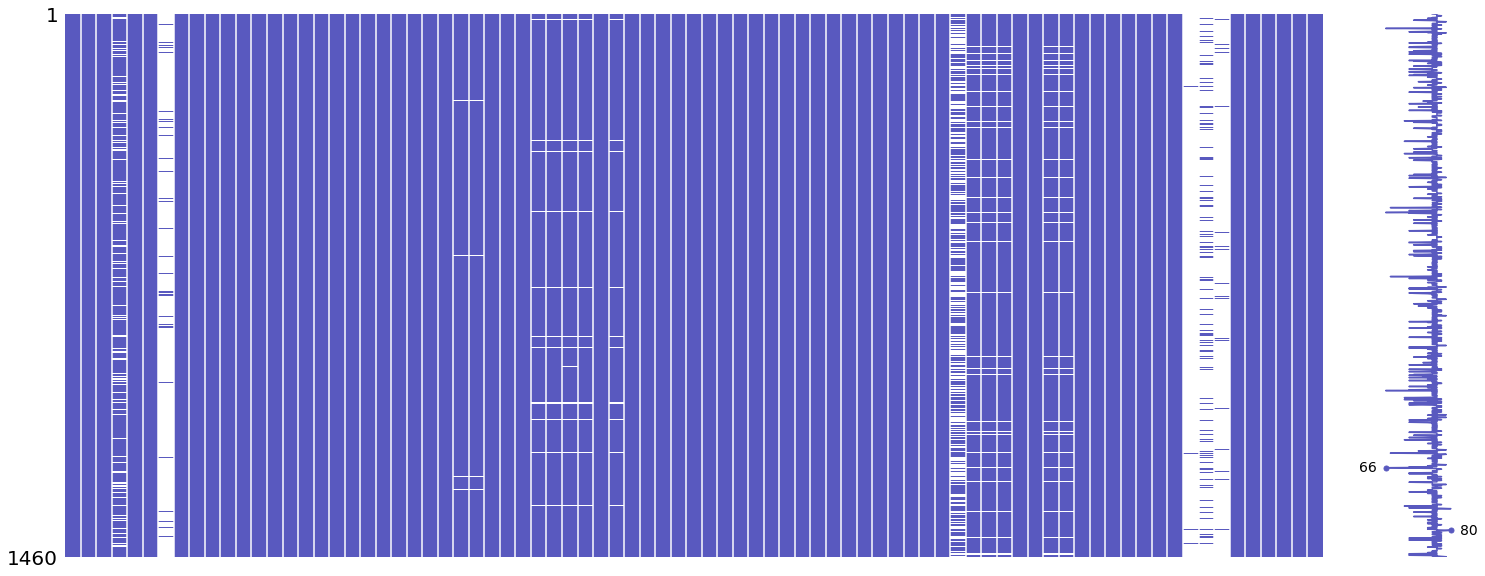

In [42]:
import missingno as msno
msno.matrix(df, color=(0.35, 0.35, 0.75));

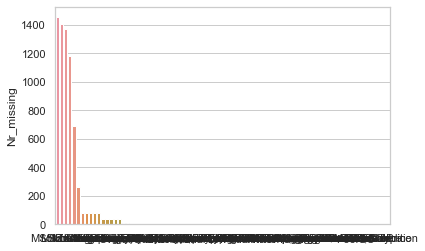

In [43]:
missing = pd.DataFrame(df.isnull().sum(), columns=['Nr_missing'])

missing.sort_values(by=['Nr_missing'], ascending=False)

#import seaborn as sns
sb.set_theme(style="whitegrid")
#tips = sb.load_dataset("tips")
ax = sb.barplot(x=missing.index, y='Nr_missing',\
                data=missing.sort_values(by=['Nr_missing'],ascending=False))

#### Dropping columns or rows

In [44]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
data = data.loc[data.isnull().mean(axis=1) < threshold]

#### Numerical features

In [45]:
# Fill missing values with a KNN prediction

# Use KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
#imputer.fit_transform(df[variables_num_miss],columns = variables_num_miss)
df[variables_num] = pd.DataFrame(imputer.fit_transform(df[variables_num]), columns=variables_num)

In [46]:
# Fill missing values with median of the corresponding column

#make a dict of columns and their medians
med_dict = {}
for v in variables_num_miss:
    med_dict[v] = df[v].median()

df.fillna(med_dict, inplace=True)

In [47]:
#Filling all missing values with 0

data = data.fillna(0)

#Filling missing values with medians of the columns
data = data.fillna(data.median())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


#### Categorical features

In [50]:
#Max fill function for categorical columns
#data['column_name'].fillna(data['column_name'].value_counts()
#.idxmax(), inplace=True)

In [51]:
# List of categorical variables with missing values
variables_cat_miss = [v for v in variables_cat if sum(df[v].isna())>0]

med_dict = {}

for v in variables_cat_miss:
    tmp = pd.DataFrame(df[v].value_counts()).rename(columns={v: 'Counts'})
    tmp.reset_index(inplace=True)
    tmp = tmp.rename(columns={'index': v})

    #fig, ax = plt.subplots()
    #ax = sb.barplot(x=v, y='Counts', data=tmp)
    #tmp.plot.bar()

    # Compute the "median" value
    tmp_df = pd.DataFrame(df[v]).dropna()
    tmp_df = pd.merge(tmp_df, tmp, how='left', on=v)
    tmp_df = tmp_df.sort_values(v).reset_index()
    med_dict[v] = tmp_df.loc[int(tmp_df.shape[0] / 2)][v]

df.fillna(med_dict, inplace=True)

### Encoding

#### Frequency encoding

In [ ]:
# For a given categorical variable, frequency is computet for each value 

for v in variables_cat:
    freq = df.groupby(v).size()/len(df)
    df.loc[:,v+'_freq'] = df[v].map(freq)

#### One hot encoding

In [ ]:
#encoded_columns = pd.get_dummies(data['column'])
#data = data.join(encoded_columns).drop('column', axis=1)

### Grouping

### PCA

Perform PCA decomposition on all numerical varibles (including the encoded ones). This compresses the dataset into 20 variables.

In [56]:
from sklearn import decomposition

target = 'SalePrice'
variables_pca = list(df.select_dtypes(include=np.number).columns)
variables_pca.remove(target)
X = df[variables_pca]
#X.shape

np.random.seed(5)

n_components = 20
pca = decomposition.PCA(n_components=n_components)
pca.fit(X)
X_pca = pca.transform(X)

In [57]:
df_pca = pd.DataFrame(X_pca, columns=['pc'+str(i) for i in range(1, n_components+1)])

In [58]:
df_pca[target] = df[target]

In [59]:
df_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,SalePrice
0,-1223.185226,171.770572,-246.211279,755.947355,-675.697118,-143.268738,-77.417200,45.042361,-0.258135,-110.856860,...,26.556588,0.642441,-15.067698,-22.126470,-19.751229,-30.379781,0.804647,-4.898112,1.267462,208500.0
1,-75.717627,-630.801976,402.917555,219.247314,-644.364573,-85.045171,61.901257,-101.457613,-36.857456,196.095852,...,-30.890053,5.015475,-22.525331,0.891069,-32.744917,7.606950,-11.686816,5.843257,0.499127,181500.0
2,1573.465417,314.416649,-368.831567,397.607618,-674.447059,-161.842186,-102.767174,13.725821,-17.828409,-111.822944,...,9.497002,12.001894,-29.342391,-26.832328,-3.023415,-25.092940,3.049305,-8.201469,-1.095270,223500.0
3,-135.967514,417.452832,-400.221730,170.193309,-668.523188,16.512925,-162.289889,-80.201019,-157.961718,-87.864215,...,-105.100783,-81.376249,50.984433,10.830298,16.077355,-1.278470,4.023008,-16.259748,37.063239,140000.0
4,4627.703880,552.218323,-153.990831,602.914453,-671.410064,-198.641087,-237.543772,85.776461,56.967889,22.491239,...,8.971366,-11.385066,-10.434828,-11.470936,-2.462153,6.573613,3.044076,-3.413389,-2.947454,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-1766.151376,673.315870,-229.608212,-204.434421,645.695816,-103.587014,24.652301,-80.415865,-25.496821,-60.797208,...,17.615873,15.805385,-25.926348,-20.568137,-8.252799,-29.434881,-2.677444,-3.730365,-1.531400,175000.0
1456,3565.877523,-44.187573,770.350568,105.883022,685.617852,332.014458,129.614148,-26.538256,44.860186,203.479448,...,23.309740,23.791194,-60.521013,-15.644719,-9.463614,0.323743,-0.311353,-0.345717,-2.311672,210000.0
1457,-580.353409,1158.204841,-5.903044,368.706734,643.442748,13.179051,390.294599,-85.319629,-8.788746,-83.373529,...,16.076779,6.606880,-31.587588,-19.058128,-25.274924,22.941709,31.283898,9.422508,-11.270478,266500.0
1458,-14.694044,-583.595089,-348.099409,-182.022721,650.026619,439.785737,-14.578838,-219.391853,489.078202,161.323194,...,-56.771593,-140.773071,-35.348328,20.318304,-18.526577,-15.233739,20.731197,10.016665,-9.352031,142125.0


### Binning

In [ ]:
#Numerical Binning Example
#data['bin'] = pd.cut(data['value'], bins=[0,30,70,100], labels=["Low", "Mid", "High"])

In [ ]:
#Categorical Binning Example

#conditions = [
#    data['Country'].str.contains('Spain'),
#    data['Country'].str.contains('Italy'),
#    data['Country'].str.contains('Chile'),
#    data['Country'].str.contains('Brazil')]

#choices = ['Europe', 'Europe', 'South America', 'South America']

#data['Continent'] = np.select(conditions, choices, default='Other')

### Feature scaling

In [61]:
# Standard scaler

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#scaled_model = make_pipeline(preprocessing.StandardScaler(), xgb.XGBRegressor(max_depth=3,eta=0.05,min_child_weight=4))
#scores = cross_val_score(scaled_model, X, y, cv=10, scoring='r2')
#scores

In [ ]:
# Custom standard z-score
#data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
#data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()

In [ ]:
#Log Transform Example
#data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
#data['log+1'] = (data['value']+1).transform(np.log)
#Negative Values Handling
#Note that the values are different
#data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)

In [ ]:
# Scaling features with a robust scaler

#from sklearn.preprocessing import RobustScaler

#scaler = RobustScaler(quantile_range=(25, 75))
#X_buyers = scaler.fit_transform(df.query('after_7d_purchases>0')[regressionInput].as_matrix())
#X_nonbuyers = scaler.transform(df.query('after_7d_purchases==0')[regressionInput].as_matrix())

In [ ]:
# Min-max scaling by hand

#data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
#data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())

In [ ]:
# Min-max scaling using a Scikit-learn scaler

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
#df.head()

### String splitting

In [ ]:
data.name
#0  Luther N. Gonzalez
#1    Charles M. Young
#2        Terry Lawson
#3       Kristen White
#4      Thomas Logsdon
#Extracting first names
data.name.str.split(" ").map(lambda x: x[0])
#0     Luther
#1    Charles
#2      Terry
#3    Kristen
#4     Thomas
#Extracting last names
data.name.str.split(" ").map(lambda x: x[-1])
#0    Gonzalez
#1       Young
#2      Lawson
#3       White
#4     Logsdon

In [ ]:
#String extraction example
data.title.head()
#0                      Toy Story (1995)
#1                        Jumanji (1995)
#2               Grumpier Old Men (1995)
#3              Waiting to Exhale (1995)
#4    Father of the Bride Part II (1995)
data.title.str.split("(", n=1, expand=True)[1].str.split(")", n=1, expand=True)[0]
#0    1995
#1    1995
#2    1995
#3    1995
#4    1995

## Modelling - Regression

In [62]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Metrics
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate

from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Defining target and datasets

In [63]:
target = 'SalePrice'

variables_num = list(df.select_dtypes(include=np.number).columns)
variables_num.remove(target)

y = df[target]
X = df[variables_num]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Simple baseline

In [64]:
model = xgb.XGBRegressor(n_estimators = 1000,\
                        learning_rate = 0.01,\
                        max_depth = 5,\
                        min_split_loss = 10,\
                        min_child_weight = 1,\
                        colsample_bytree = 0.7,\
                        subsample = 0.5,\
                        reg_lambda = 2,\
                        reg_alpha = 0)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [65]:
# Print out performance metrics
print(f"Explained variance:    {explained_variance_score(y_test, y_pred)}")
print(f"R2:                    {r2_score(y_test, y_pred)}")
print(f"MAE:                   {mean_absolute_error(y_test, y_pred)}")
print(f"MSE:                   {mean_squared_error(y_test, y_pred)}")

Explained variance:    0.8934566126116386
R2:                    0.893411220396054
MAE:                   13977.279296875
MSE:                   434904809.9664864


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

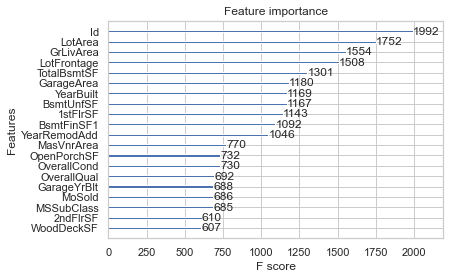

In [66]:
# Plot variable importance for top 20 variables
xgb.plot_importance(model, max_num_features=20)

### Hyperparameter tuning

Tune the model using random search and cross-validation

In [67]:
def hyperParameterTuningRandom(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.02, 0.05, 0.075, 0.1],
        'n_estimators' : [100, 200, 500, 1000],
        'max_depth': [3, 4, 5], # Maximum depth of a tree.
        'reg_lambda': [1, 2, 5, 10], # L2 regularisation parameter
        'reg_alpha': [0, 1, 2], # L1 regularization parameter
        'min_split_loss': [0, 1, 5, 10], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
        'min_child_weight': [1, 3, 5], #Minimum sum of instance weight (hessian) needed in a child. The larger min_child_weight is, the more conservative the algorithm will be.
        'subsample': [0.5, 0.7], # Fraction of examples sampled for training
        'colsample_bytree': [0.5, 0.7, 1], # Fraction of columns sampled for training 
        #'objective': ['reg:squarederror'],
    }
    
    xgb_model = XGBRegressor()

    rsearch = RandomizedSearchCV(xgb_model, param_tuning, n_iter=50, cv=5,\
                                 random_state=1, scoring='r2')

    model = rsearch.fit(X_train,y_train)

    #return rsearch.best_params_
    return model

In [69]:
import time

start_time = time.time()
model = hyperParameterTuningRandom(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 172.21920204162598 seconds ---


In [70]:
# Print out the best parameters
model.best_params_

{'subsample': 0.5,
 'reg_lambda': 2,
 'reg_alpha': 0,
 'n_estimators': 1000,
 'min_split_loss': 10,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.01,
 'colsample_bytree': 0.7}

In [71]:
# Make a prediction on the test set

y_pred_rscv = model.predict(X_test)
print(f"Explained variance:    {explained_variance_score(y_test, y_pred_rscv)}")
print(f"R2:                    {r2_score(y_test, y_pred_rscv)}")
print(f"MAE:                   {mean_absolute_error(y_test, y_pred_rscv)}")
print(f"MSE:                   {mean_squared_error(y_test, y_pred_rscv)}")

Explained variance:    0.8934566126116386
R2:                    0.893411220396054
MAE:                   13977.279296875
MSE:                   434904809.9664864


Text(0.5, 1.0, 'Prediction vs Ground Truth with XGB')

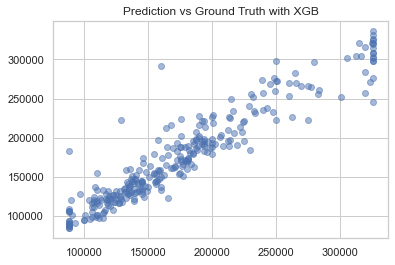

In [72]:
plt.scatter(y_test, y_pred_rscv, alpha=0.5)
plt.title('Prediction vs Ground Truth with XGB')

### AutoML Crosscheck

In [73]:
import h2o
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_73"; Java(TM) SE Runtime Environment (build 1.8.0_73-b02); Java HotSpot(TM) 64-Bit Server VM (build 25.73-b02, mixed mode)
  Starting server from /usr/local/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/3s/9_kjrdzj0mn5_prmzlvw2x580000gq/T/tmpeblaoiie
  JVM stdout: /var/folders/3s/9_kjrdzj0mn5_prmzlvw2x580000gq/T/tmpeblaoiie/h2o_snezana_started_from_python.out
  JVM stderr: /var/folders/3s/9_kjrdzj0mn5_prmzlvw2x580000gq/T/tmpeblaoiie/h2o_snezana_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Zurich
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,4 months and 27 days !!!
H2O_cluster_name:,H2O_from_python_snezana_cbks4h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [75]:
data = h2o.import_file('train.csv',header=1,sep=',')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [77]:
data

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,307000
8,60,RL,nan,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51,6120,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NA,NA,NA,0,4,2008,WD,Abnorml,129900
10,190,RL,50,7420,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NA,NA,NA,0,1,2008,

In [78]:
splits = data.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

x = train.columns
y = target
x.remove(y)

In [79]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs = 1000, seed = 1, project_name = "House_pricing",\
                exclude_algos = ["StackedEnsemble","DeepLearning"], nfolds=5)
aml.train(y = y, x = x,  training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [80]:
# Get leader board

aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_grid__1_AutoML_20210225_111531_model_2,6.49115e+08,25477.7,6.49115e+08,15137.9,0.110022
GBM_grid__1_AutoML_20210225_111531_model_9,6.7107e+08,25905,6.7107e+08,14675.2,0.113021
GBM_grid__1_AutoML_20210225_111531_model_8,7.03855e+08,26530.3,7.03855e+08,15733.7,0.115354
GBM_grid__1_AutoML_20210225_111531_model_14,7.07029e+08,26590,7.07029e+08,15201.4,0.114043
GBM_grid__1_AutoML_20210225_111531_model_7,7.70875e+08,27764.6,7.70875e+08,15043.5,0.113572
XGBoost_grid__1_AutoML_20210225_111531_model_36,7.87802e+08,28067.8,7.87802e+08,17316.3,0.12684
XGBoost_grid__1_AutoML_20210225_111531_model_2,7.89457e+08,28097.3,7.89457e+08,17902.7,0.140719
XGBoost_grid__1_AutoML_20210225_111531_model_23,8.00312e+08,28289.8,8.00312e+08,18164.5,0.135251
GBM_1_AutoML_20210225_111531,8.07555e+08,28417.5,8.07555e+08,15696.7,0.117617
GBM_grid__1_AutoML_20210225_111531_model_6,8.16212e+08,28569.4,8.16212e+08,15219.7,0.113124


In [81]:
# Get the details about the leader

aml.leader

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210225_111531_model_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,67.0,67.0,40740.0,8.0,8.0,8.0,11.0,83.0,43.55224




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 59750236.13386013
RMSE: 7729.82769108472
MAE: 5156.10260193133
RMSLE: 0.04751576047489684
Mean Residual Deviance: 59750236.13386013

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 819462527.690624
RMSE: 28626.255914642836
MAE: 16533.553719194242
RMSLE: 0.13640535330861384
Mean Residual Deviance: 819462527.690624

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,16533.555,1470.0482,16817.97,18328.299,17439.48,15222.785,14859.233
1,mean_residual_deviance,8.1946253E8,2.7968496E8,1.17751808E9,8.400704E8,9.901792E8,5.9066861E8,4.98876384E8
2,mse,8.1946253E8,2.7968496E8,1.17751808E9,8.400704E8,9.901792E8,5.9066861E8,4.98876384E8
3,r2,0.86261535,0.046500698,0.787637,0.8645092,0.8633277,0.88457894,0.91302377
4,residual_deviance,8.1946253E8,2.7968496E8,1.17751808E9,8.400704E8,9.901792E8,5.9066861E8,4.98876384E8
5,rmse,28281.057,4955.351,34314.984,28983.969,31467.113,24303.676,22335.541
6,rmsle,0.13621588,0.008035328,0.14301036,0.13888003,0.14099738,0.13544996,0.122741684



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-02-25 11:20:08,5.818 sec,0.0,77366.442887,56672.199846,5.985566e+09
1,,2021-02-25 11:20:08,5.905 sec,5.0,50900.619997,36077.964096,2.590873e+09
2,,2021-02-25 11:20:08,5.974 sec,10.0,33821.492104,23267.170219,1.143893e+09
3,,2021-02-25 11:20:08,6.043 sec,15.0,23944.048150,15793.017120,5.733174e+08
4,,2021-02-25 11:20:08,6.107 sec,20.0,18349.588711,11646.608111,3.367074e+08
5,,2021-02-25 11:20:08,6.169 sec,25.0,15035.496564,9243.730663,2.260662e+08
6,,2021-02-25 11:20:08,6.242 sec,30.0,13119.085432,7906.733604,1.721104e+08
7,,2021-02-25 11:20:08,6.301 sec,35.0,11945.229046,7128.839079,1.426885e+08
8,,2021-02-25 11:20:08,6.349 sec,40.0,10805.074406,6592.893076,1.167496e+08
9,,2021-02-25 11:20:09,6.407 sec,45.0,10020.521341,6213.819709,1.004108e+08



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,OverallQual,8.117022e+12,1.000000,0.266868
1,ExterQual,3.900946e+12,0.480588,0.128254
2,GarageCars,3.748676e+12,0.461829,0.123247
3,Neighborhood,2.906804e+12,0.358112,0.095569
4,GrLivArea,2.457229e+12,0.302725,0.080788
5,1stFlrSF,1.677516e+12,0.206666,0.055153
6,KitchenQual,1.007865e+12,0.124167,0.033136
7,BsmtFinSF1,7.535078e+11,0.092831,0.024773
8,TotalBsmtSF,5.814965e+11,0.071639,0.019118
9,TotRmsAbvGrd,4.768058e+11,0.058741,0.015676



See the whole table with table.as_data_frame()


In [82]:
# Predict and evaluate performance
pred = aml.leader.predict(test)
perf = aml.leader.model_performance(test)
perf

gbm prediction progress: |████████████████████████████████████████████████| 100%

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 649114873.3265669
RMSE: 25477.73289220544
MAE: 15137.85514255215
RMSLE: 0.11002155316813866
Mean Residual Deviance: 649114873.3265669


In [83]:
# Print the r2 metric for the leader

print(aml.leader.r2())
print(aml.leader.r2(test))

0.9900176138241887
0.9900176138241887


In [84]:
# Plot prediction vs truth

test_pred = test
test_pred['pred'] = pred

In [85]:
df_test_pred = test_pred.as_data_frame()

Text(0.5, 1.0, 'Prediction vs Ground Truth with H2O')

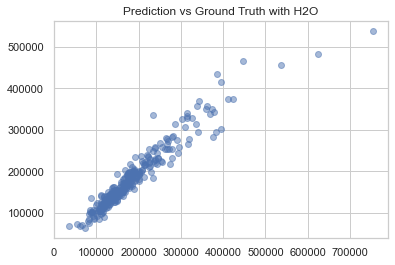

In [86]:
plt.scatter(df_test_pred['SalePrice'], df_test_pred['pred'], alpha=0.5)
plt.title('Prediction vs Ground Truth with H2O')

## Modelling - Classification

In [88]:
variables = list(df.select_dtypes(include=np.number).columns)
variables.remove(target)
#variables.remove('user_id')

y = df[target]
X = df[variables]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [136]:
imbalance = len(y_train)/sum(y_train)

### Simple baseline

In [138]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=20,\
                              random_state=42, eval_metric=["auc"],\
                             scale_pos_weight=imbalance)
#eval_metric=["auc", "error", "error@0.6"]

#xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

### Performance evaluation

In [139]:
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("Accuracy: %f" % (accuracy))

Accuracy: 0.628750


In [140]:
#Precision = ((True Positive)/(True Positive + False Positive))
#Recall = ((True Positive)/(True Positive + False Negative))

In [141]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[22612 14069]
 [  781  2538]]
              precision    recall  f1-score   support

           0       0.97      0.62      0.75     36681
           1       0.15      0.76      0.25      3319

    accuracy                           0.63     40000
   macro avg       0.56      0.69      0.50     40000
weighted avg       0.90      0.63      0.71     40000



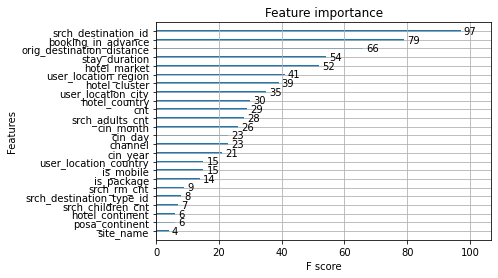

In [143]:
xgb.plot_importance(xgb_model)
plt.show()

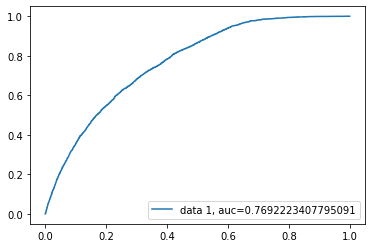

Accuracy 0.62875


In [151]:
# Draw the ROC curve

y_pred_proba = xgb_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
print("Accuracy", metrics.accuracy_score(y_test, y_pred))